Nama : Ulan Sawalia

NPM  : 2108107010024

Dataset

dataset yang saya ambil berasal dari Kaggle: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Dataset yang berisi kumpulan data yang berisi informasi tentang harga dan penjualan avokad dari berbagai wilayah di Amerika Serikat.

*Informasi Atribut: 
1. Date 
2. AveragePrice 
3. type 
4. year 
5. Region 
6. Total volume
7. 4046 - total buah terjual 4046
8. 4225 - total buah terjual 4225
9. 4770 - total buah terjual 4770
10. Total Bags	
11. Small Bags	
12. Large Bags	
13. XLarge Bags

Studi Kasus : Memprediksi harga dari buah alpukat di wilayah Amerika Serikat

<h1>Import Library</h1>


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [14]:
# Memuat data
url = "avocado.csv"
data = pd.read_csv(url)

In [15]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [16]:
# Memilih fitur yang akan digunakan untuk regresi
X = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]
y = data['AveragePrice']

In [17]:
data.shape

(18249, 14)

In [18]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [19]:
len(data.region.unique())

54

### Split data dan Normalisasi

In [20]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


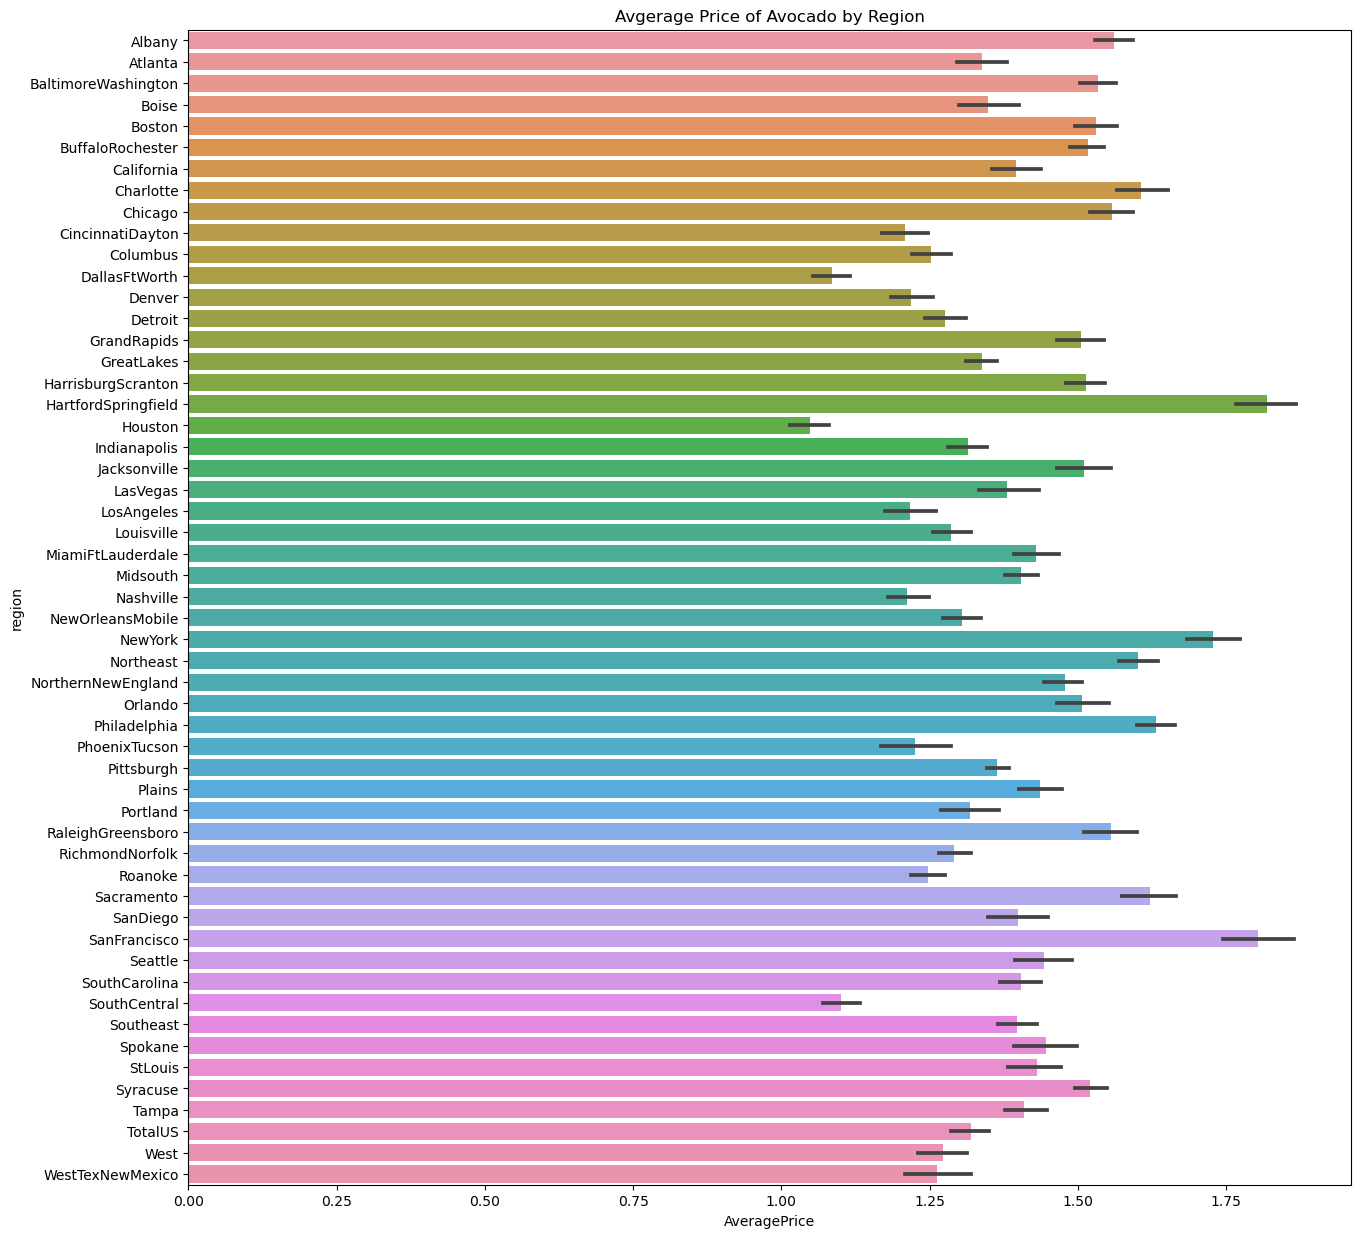

In [21]:
plt.figure(figsize=(15,15))

plt.title("Avgerage Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data= data)

plt.show()

In [22]:
# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Membuat Model SVR

In [23]:
# Membuat model SVR dan melatihnya pada data latih
svr = SVR(kernel='rbf')  # Anda dapat mengubah kernel sesuai kebutuhan
svr.fit(X_train_scaled, y_train)


SVR()

In [24]:
# Melakukan prediksi pada data uji
y_pred = svr.predict(X_test_scaled)

In [25]:
# Evaluasi performa model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 0.09633212179458203
Coefficient of Determination (R^2): 0.4004314968045112


Membangun model prediksi SVR dan menghasilkan prediksi dengan skor 

* MSE : 0.09633212179458203

* Coefficient of Determination (R^2): 0.4004314968045112

### Visualisasi

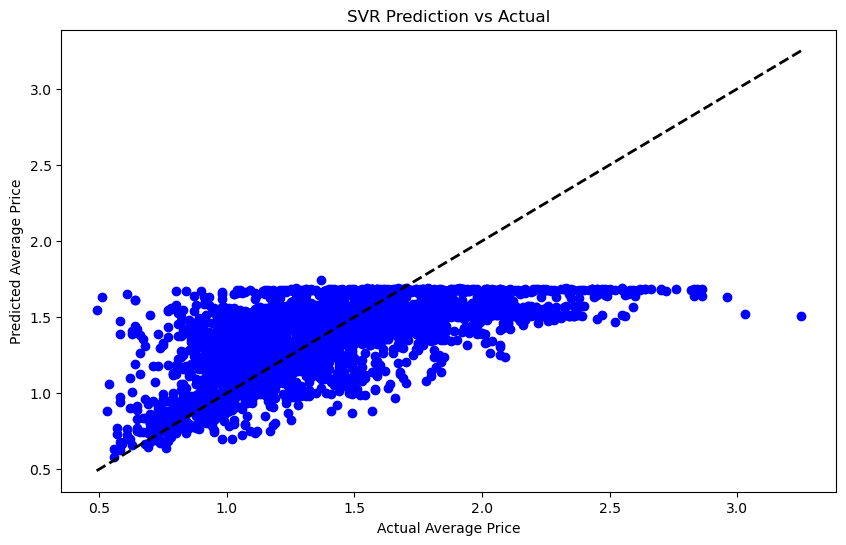

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('SVR Prediction vs Actual')
plt.show()

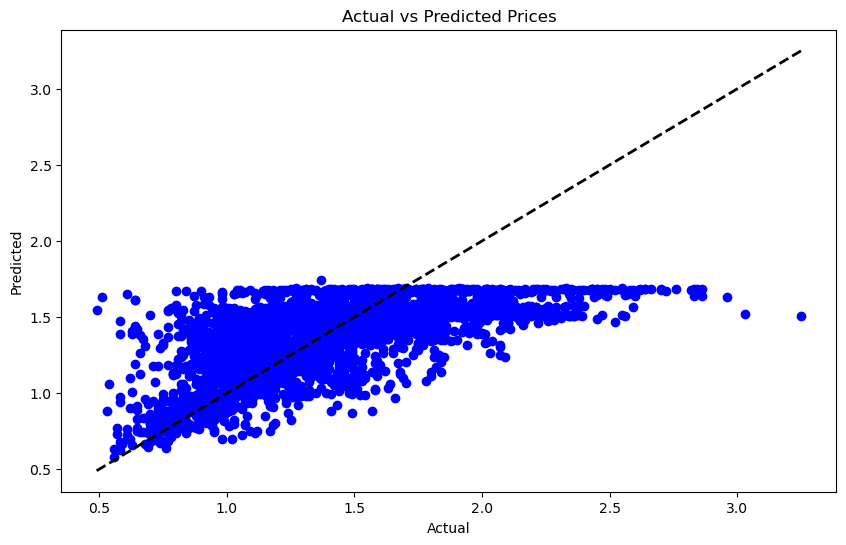

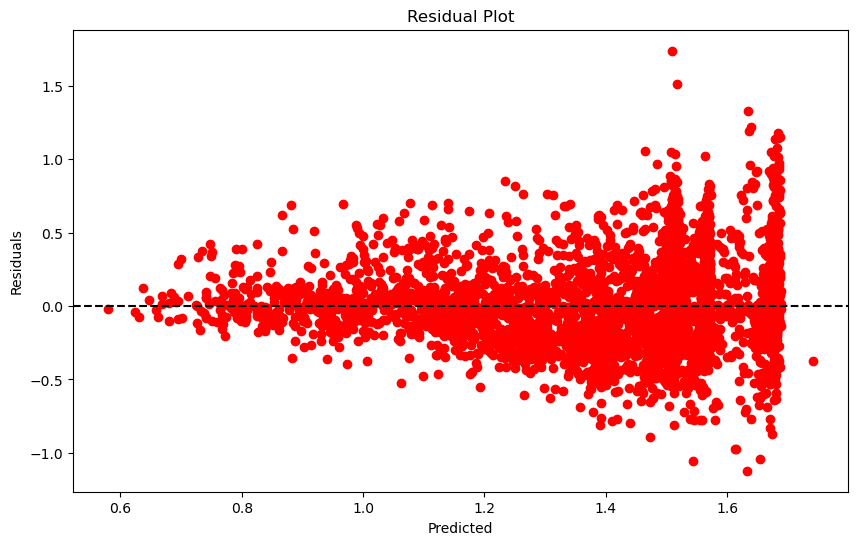

In [27]:
# Prediksi harga menggunakan model SVR
y_pred = svr.predict(X_test_scaled)

# Plot Sebaran Prediksi vs. Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot Residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

# Visualisasi Hyperplane (hanya untuk kernel linear)
if svr.kernel == 'linear':
    coef = svr.coef_[0]
    intercept = svr.intercept_

    # Plot data points
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_scaled[:, 0], y_test, color='black', label='Data')
    
    # Plot hyperplane
    hyperplane = X_test_scaled[:, 0] * coef[0] + X_test_scaled[:, 1] * coef[1] + X_test_scaled[:, 2] * coef[2] + intercept
    plt.plot(X_test_scaled[:, 0], hyperplane, color='blue', linewidth=3, label='Hyperplane')
    
    plt.xlabel('Features')
    plt.ylabel('Price')
    plt.title('Hyperplane Visualization')
    plt.legend()
    plt.show()


Dengan menggunakan model Support Vector Regression (SVR) untuk memprediksi harga avocado berdasarkan data yang telah di-scaling. Setelah melakukan prediksi, dilakukan visualisasi dengan membuat scatter plot yang membandingkan harga aktual dengan harga yang diprediksi, serta plot residual untuk mengevaluasi kesalahan prediksi.

Polynomial equation:
           3           2
-0.002536 x + 0.06836 x - 0.44 x + 1.343


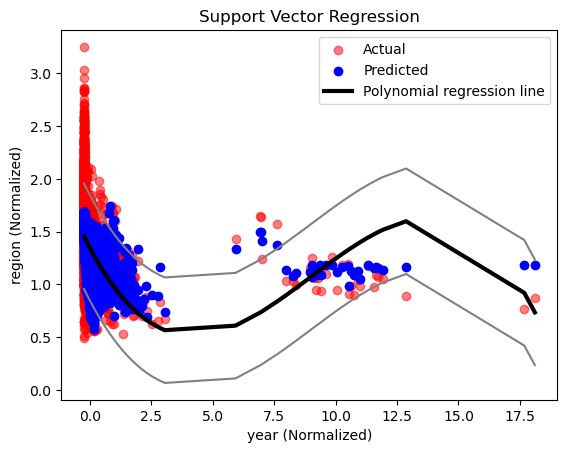

In [30]:
# Sort the test data and predicted data
sorted_indices = np.argsort(X_test_scaled[:, 0], axis=0)
X_test_sorted = X_test_scaled[sorted_indices, 0].reshape(-1, 1)
y_pred_sorted = y_pred[sorted_indices]

# Fit a polynomial curve
coefficients = np.polyfit(X_test_sorted.flatten(), y_pred_sorted, 3)
polynomial = np.poly1d(coefficients)

# Print the polynomial equation
print("Polynomial equation:")
print(polynomial)

# Plot data points
plt.scatter(X_test_scaled[:, 0], y_test, alpha=0.5, color='red', label='Actual')
plt.scatter(X_test_scaled[:, 0], y_pred, color='blue', label='Predicted')

# Plot polynomial curve
plt.plot(X_test_sorted, polynomial(X_test_sorted), color='black', label='Polynomial regression line', linewidth=3)
plt.plot(X_test_sorted, polynomial(X_test_sorted) - 0.5, color='gray')
plt.plot(X_test_sorted, polynomial(X_test_sorted) + 0.5, color='gray')
plt.title('Support Vector Regression') 
plt.xlabel('year (Normalized)')
plt.ylabel('region (Normalized)')
plt.legend()
plt.show()


Distribusi data tampaknya cukup merata di sekitar kurva .
Tidak ada outlier yang terlihat jelas.
Kurva regresi tampaknya cukup dekat dengan data aktual.